In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
y_true = [1,1,0,0,2,1,0,2,2]
y_pred = [1,1,0,1,1,0,0,2,1]

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [4]:
import pandas as pd
df = pd.DataFrame({"y_true":y_true, "y_pred":y_pred})

In [5]:
pd.crosstab(df.y_true, df.y_pred, margins=True)

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


In [6]:
result = pd.read_csv("http://javaspecialist.co.kr/pds/382")

In [7]:
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [8]:
pd.crosstab(result.y_true, result.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [10]:
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [11]:
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [12]:
# specificity
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [13]:
# fallout, 오류율
1-recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [14]:
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           weights=[0.95, 0.05],
                           random_state=5)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [17]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [18]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [19]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [20]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))

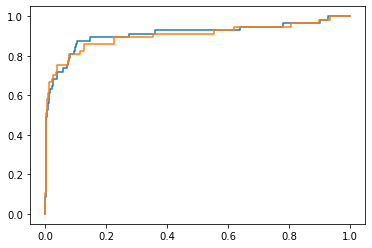

In [21]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.show()

In [22]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)